In [1]:
from __future__ import print_function
import keras
import numpy as np
from PIL import Image
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from utils.custom_generator import custom_image_generator
from utils.image import ImageDataGenerator
from matplotlib.pyplot import imshow

/raid/data/alexandros/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# load the data and split to training and validation sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
num_classes = 10
# MNIST model in Keras using sequential model building
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# compile the network with categorical crossentropy objective function and Adam optimizer. 
# other optimizers include Adam, Adadelta, etc 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])


In [4]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
train_batch_size = 128
val_batch_size = 128

# convert class vectors to binary class matrices
print (y_train.shape)
print (y_test.shape)
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(60000,)
(10000,)
5
(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# create training and validation generators
train_generator =  custom_image_generator(
    ImageDataGenerator(rescale=1./255),
    x_train, y_train,
    seed=1,  # Use a specific random seed
    batch_size=train_batch_size,  # Use batch size of 128
    )

validation_generator =  custom_image_generator(
    ImageDataGenerator(rescale=1./255),
    x_test, y_test,
    seed=1,  # Use a specific random seed
    batch_size=val_batch_size,  #Use batch size of 128
    )

In [8]:
epochs = 12

# train the network for the number of epochs defined
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=x_train.shape[0] // train_batch_size,
    validation_data = validation_generator,
    validation_steps=x_test.shape[0] // val_batch_size,
    epochs=epochs
    )


Epoch 1/12
468/468 [==============================] - 10s 22ms/step - loss: 0.2375 - acc: 0.9281 - val_loss: 0.0520 - val_acc: 0.9832
Epoch 2/12
468/468 [==============================] - 5s 12ms/step - loss: 0.0856 - acc: 0.9745 - val_loss: 0.0399 - val_acc: 0.9856
Epoch 3/12
468/468 [==============================] - 5s 11ms/step - loss: 0.0617 - acc: 0.9810 - val_loss: 0.0325 - val_acc: 0.9889
Epoch 4/12
468/468 [==============================] - 5s 11ms/step - loss: 0.0506 - acc: 0.9845 - val_loss: 0.0389 - val_acc: 0.9874
Epoch 5/12
468/468 [==============================] - 5s 11ms/step - loss: 0.0437 - acc: 0.9866 - val_loss: 0.0324 - val_acc: 0.9884
Epoch 6/12
468/468 [==============================] - 5s 11ms/step - loss: 0.0383 - acc: 0.9882 - val_loss: 0.0305 - val_acc: 0.9900
Epoch 7/12
468/468 [==============================] - 5s 11ms/step - loss: 0.0336 - acc: 0.9889 - val_loss: 0.0328 - val_acc: 0.9901
Epoch 8/12
468/468 [==============================] - 5s 12ms/step -

In [11]:
model.save('./models/mnist_model.h5')

In [12]:
# load pre-trained model
model = load_model('models/mnist_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

img_height 225
img_width 225
(1, 28, 28, 1)


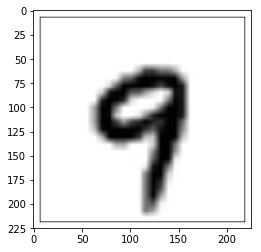

In [13]:
# load image
img = Image.open('images/mnist_img_1.jpeg')
imshow(img)
print ('img_height', img.size[0])
print ('img_width', img.size[1])
# convert to grayscale and reshape the array to the network input size
resized_img = img.resize((img_cols, img_rows))
resized_img = resized_img.convert('L')
resized_img = np.asarray(resized_img, dtype=np.float32)
resized_img/=255
resized_img = np.reshape(resized_img, (1, img_rows, img_cols, 1))
print(resized_img.shape)

In [14]:
# predict number based on the network output
out = model.predict(resized_img)
print ("Softmax values:", out)
print("This number is", out.argmax())

Softmax values: [[1.6903081e-04 1.2680322e-07 1.3373308e-03 3.6712136e-04 1.0917443e-05
  1.8726547e-05 5.5147405e-07 5.5208504e-03 3.6758539e-04 9.9220771e-01]]
This number is 9
